In [1]:
import pandas as pd
# Importar utilidades para gestión de rutas
from cedenar_anomalies.utils.paths import (
    data_processed_dir,
    data_raw_dir,
    data_interim_dir,
    models_dir
)

In [2]:
cluster = pd.read_csv(data_processed_dir('dataset_con_clusters.csv'))
cluster.sample(5)

,Orden,Usuario,Ejecucion,Codigo,Descripcion,Motivo,kWh Rec,Factor,id,Nombre,...,KVA,LATI_USU,LONG_USU,puntaje,evaluacion,Zona,cluster_id,cluster_0,cluster_1,cluster_2
241461,37436166,1108368,2024-12-06 14:47:00-05,82,Anomalia verificada y aprobada,Creacion Sello Tapa Principal #4,2683.0,NaN,16.0,SE CORRIGE ANOMALÍA,...,25.0,1.494791,-77.075942,1.0,1.0,NO,0,0.809859,0.123393,0.066748
43885,21938163,1006563,2022-10-14 08:54:46-05,38,Anomalia verificada y aprobada,Creacion Sello Tapa Principal #4,137.0,NaN,34.0,CONEXIÓN EN BORNES CONFORME,...,75.0,1.817797,-78.746262,2.0,2.0,PA,2,0.002960,0.001755,0.995285
255602,33088437,1229782,2024-05-08 11:10:16-05,NaN,Posible anomalia,Disponible,NaN,NaN,NaN,NaN,...,75.0,0.824879,-77.629119,NaN,NaN,SU,1,0.098295,0.871264,0.030441
82417,32485213,1099257,2024-06-08 08:08:01-05,38,Anomalia verificada con acta digital,No Procede Pare,NaN,NaN,23.0,ACOMETIDA INTERVENID,...,75.0,1.816380,-78.752018,5.0,3.0,PA,0,0.936998,0.036346,0.026655
154728,32530577,208786,2024-04-11 12:35:49-05,431,Anomalia verificada con acta digital,No Procede Pare,NaN,40.0,4.0,ORDEN FACTOR,...,30.0,1.212956,-77.279864,1.0,1.0,CE,1,0.004984,0.990058,0.004957


In [5]:
cluster.columns

Index(['Orden', 'Usuario', 'Ejecucion', 'Codigo', 'Descripcion', 'Motivo',
       'kWh Rec', 'Factor', 'id', 'Nombre', 'Factor.1', 'AREA',
       'PLAN_COMERCIAL', 'TRAFO_OPEN', 'FASES', 'KVA', 'LATI_USU', 'LONG_USU',
       'puntaje', 'evaluacion', 'Zona', 'cluster_id', 'cluster_0', 'cluster_1',
       'cluster_2'],
      dtype='object')

In [4]:
cluster_jess = pd.read_csv(data_processed_dir('df_anomaly_encoded_fzz_2_ind.csv'), encoding='latin-1')
cluster_jess.sample(5)


,Orden,Usuario,Ejecucion,Codigo,Descripcion,Motivo,kWh Rec,Factor,id,Nombre,...,AREA,PLAN_COMERCIAL,TRAFO_OPEN,FASES,KVA,LATI_USU,LONG_USU,puntaje,evaluacion,Cluster
871,17769102,1227792,2022-03-10 09:08:31-05,38,Anomalia verificada con acta digital,No Procede Pare,NaN,NaN,36,INSPECCIÓN TÉCNICA CONFORME,...,Urbano,2-PLAN RESIDENCIAL,05TN000146,1.0,112.5,1.667221,-78.140844,1,1,0
145035,35826998,1066914,2024-09-19 11:53:51-05,82,Anomalia verificada y aprobada,Creacion Sello Tapa Principal #4,453.0,NaN,16,SE CORRIGE ANOMALÍA,...,Urbano,31-PLAN RESIDENCIAL TELEMEDIDO,60TA010394,1.0,75.0,1.821723,-78.764561,1,1,0
156738,37152720,1130155,2024-11-26 11:24:35-05,1,Anomalia verificada y aprobada,Otras Anomalias,2218.0,NaN,69,ACOMETIDA O DERIVACIÓN NO AUTORIZADA HA,...,Urbano,2-PLAN RESIDENCIAL,60TA033016,1.0,112.5,1.806984,-78.776996,5,3,0
90702,27083455,547976,2023-07-10 07:22:44-05,30006,Anomalia verificada y aprobada,Destacados Flash,3419.0,NaN,38,ADICION DE ENERGIA RECUPERADA,...,Rural,2-PLAN RESIDENCIAL,60TN000351,1.0,30.0,1.414348,-78.440555,1,1,1
41156,19585202,1191109,2022-06-13 16:03:33-05,82,Anomalia verificada y aprobada,Existencia Otras Cargas,1147.0,NaN,41,LINEA DIRECTA CON CARGA CONOCIDA,...,Urbano,2-PLAN RESIDENCIAL,60TA044002,1.0,75.0,1.781405,-78.786924,5,3,0


In [12]:
df = cluster.copy()
df_zona = df[df['Zona'] == 'PA']

# --- Gráfico 1: Puntaje por evaluación y cluster ---
pivot = df_zona.pivot_table(index='cluster_id', columns='evaluacion', values='puntaje', aggfunc='count', fill_value=0)
# pivot = pivot[[1, 2, 3, 4, 5]] if all(i in pivot.columns for i in [1,2,3,4,5]) else pivot
# pivot.sample(5)

In [20]:
kwh = df_zona.groupby('cluster_id')['kWh Rec'].sum().sort_index()
kwh

cluster_id
0    6967548.0
1    8950431.0
2    2368977.0
Name: kWh Rec, dtype: float64

In [13]:
pivot

,puntaje
cluster_id,
0,156278.0
1,81551.0
2,123139.0


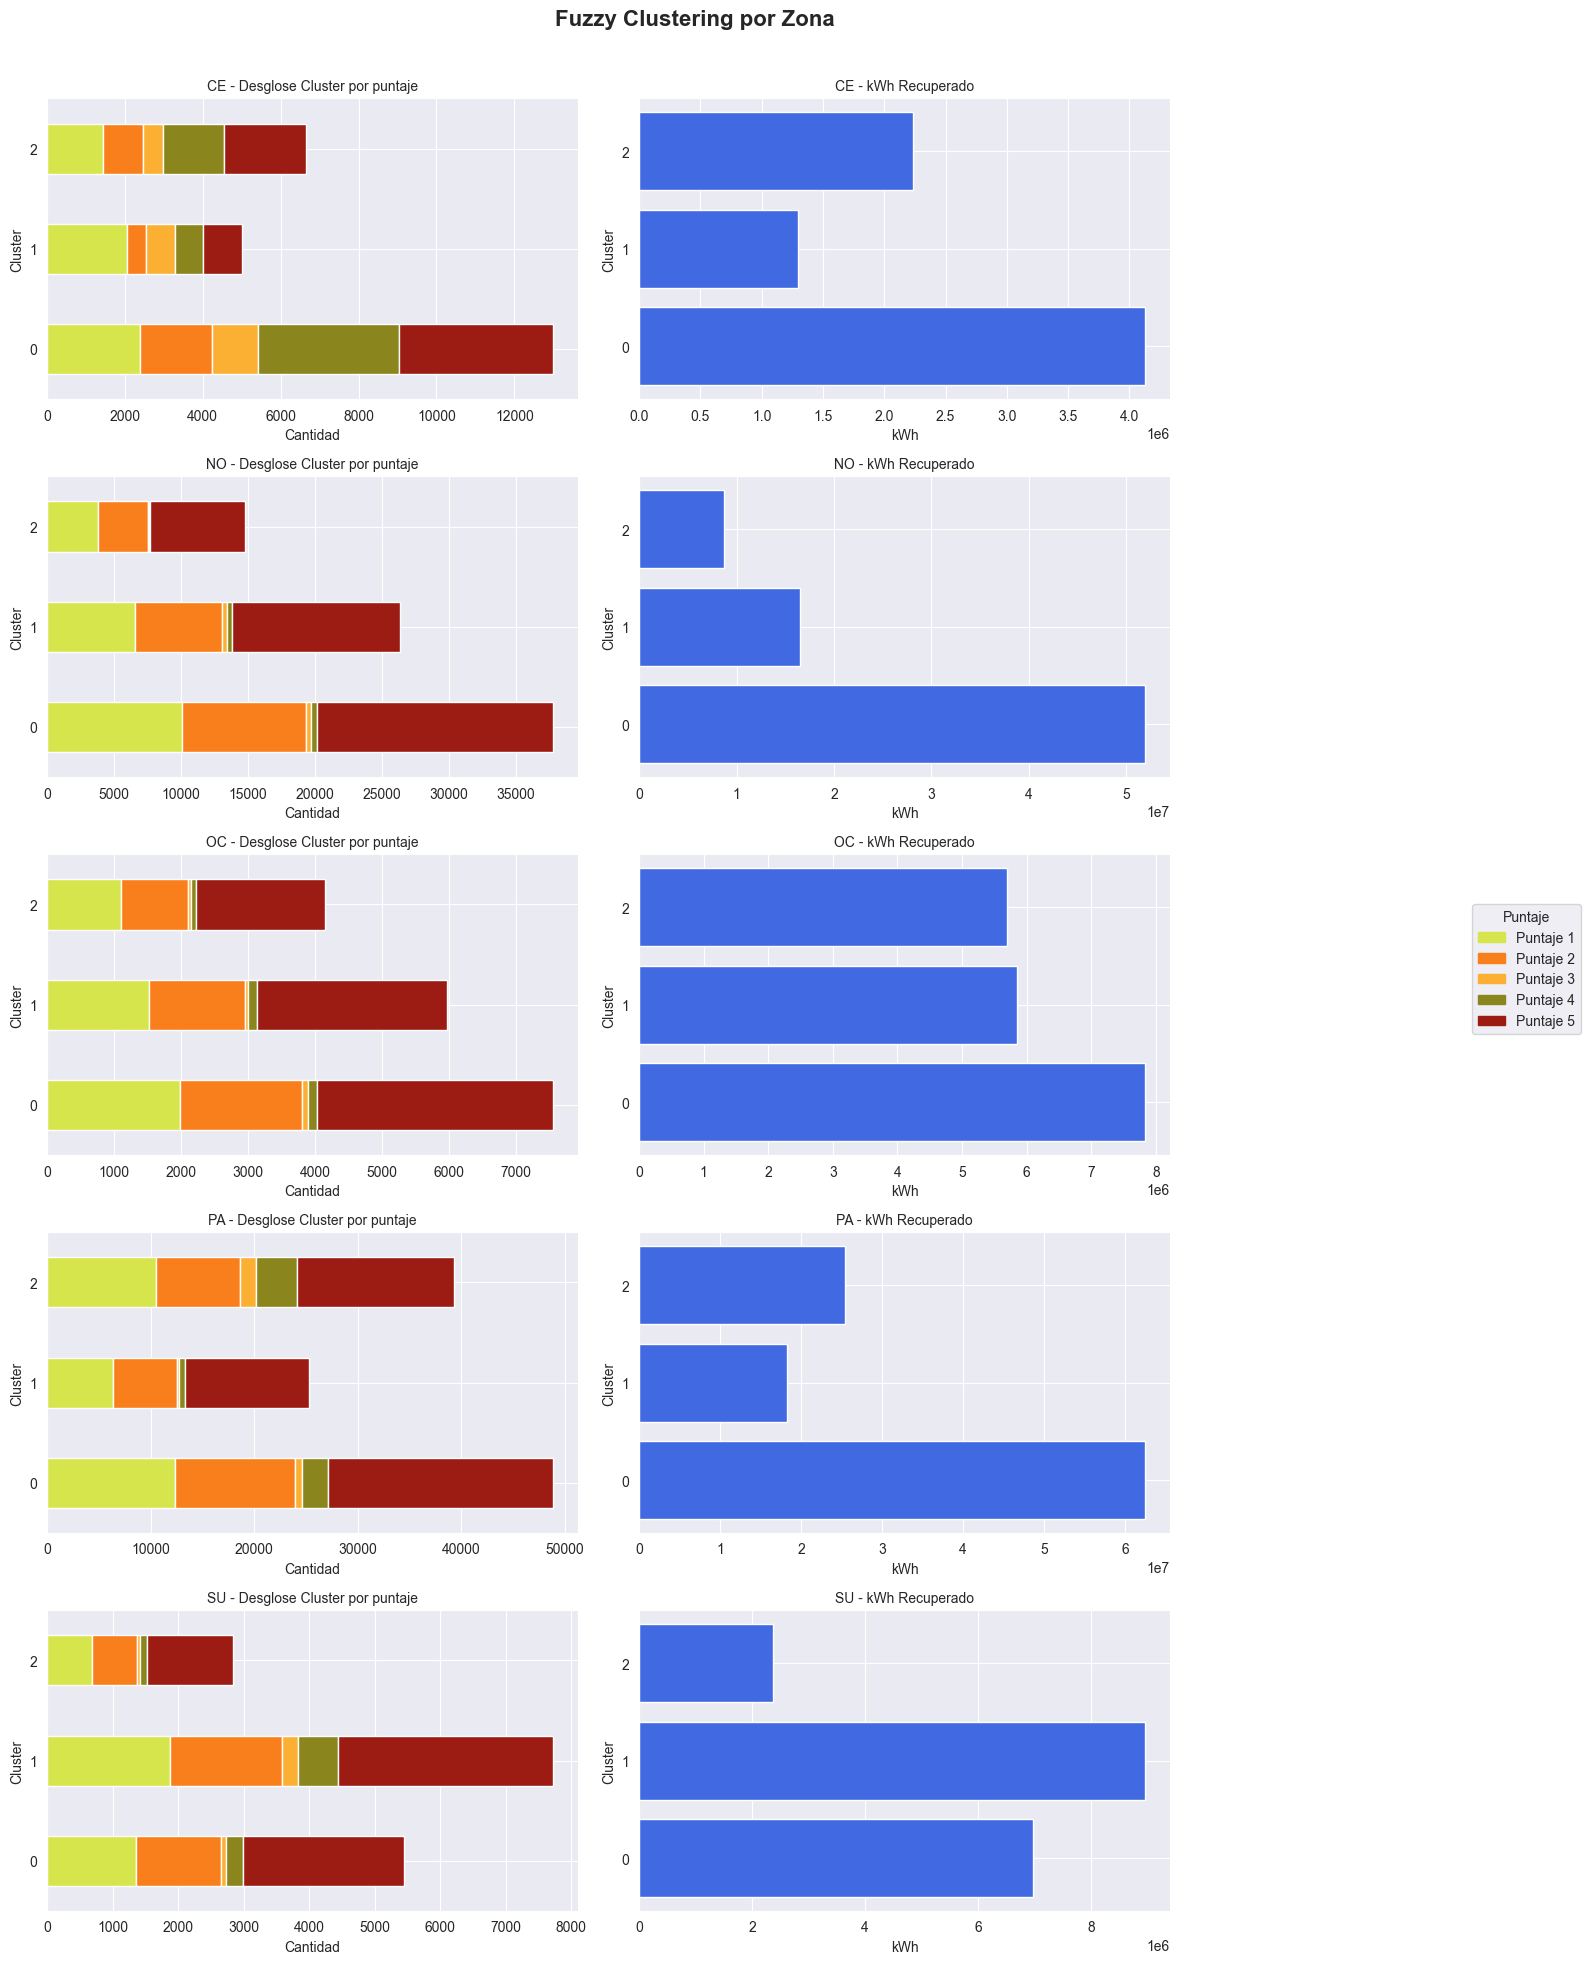

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asume que `df` ya está cargado

# Paleta para los puntajes
colores_puntaje = {
    1: '#d6e54c',
    2: '#f97f1c',
    3: '#fbb034',
    4: '#8a851c',
    5: '#9c1c13'
}
colores = [colores_puntaje.get(i, "#cccccc") for i in sorted(colores_puntaje)]

# Zonas únicas
zonas = sorted(df['Zona'].dropna().unique())
n = len(zonas)

# Crear figura
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(14, n * 4))

for i, zona in enumerate(zonas):
    df_zona = df[df['Zona'] == zona]

    # === Gráfico 1: Desglose de puntaje por cluster ===
    pivot = df_zona.groupby('cluster_id')['puntaje'].value_counts().unstack(fill_value=0)
    pivot = pivot[[1, 2, 3, 4, 5]] if all(k in pivot.columns for k in [1, 2, 3, 4, 5]) else pivot
    ax1 = axes[i, 0]
    pivot.plot(kind='barh', stacked=True, color=colores, ax=ax1, legend=False)
    ax1.set_title(f"{zona} - Desglose Cluster por puntaje", fontsize=10)
    ax1.set_xlabel("Cantidad")
    ax1.set_ylabel("Cluster")

    # === Gráfico 2: kWh Recuperado por cluster (barh) ===
    kwh = df_zona.groupby('cluster_id')['kWh Rec'].sum().sort_index()
    ax2 = axes[i, 1]
    ax2.barh(kwh.index.astype(str), kwh.values, color='royalblue')
    ax2.set_title(f"{zona} - kWh Recuperado", fontsize=10)
    ax2.set_xlabel("kWh")
    ax2.set_ylabel("Cluster")
    # ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x / 1_000_000)} M"))

# Leyenda para los puntajes
handles = [plt.Rectangle((0, 0), 1, 1, color=colores_puntaje[k]) for k in sorted(colores_puntaje)]
labels = [f"Puntaje {k}" for k in sorted(colores_puntaje)]
fig.legend(handles, labels, title="Puntaje", bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.suptitle("Fuzzy Clustering por Zona", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 0.85, 0.97])
plt.show()
